$$\large \textbf{This program is to use the Learning Curve to evaluate the trained model with the logistic regression}$$

$$\small \textbf{The CopyRight @ Phuong V. Nguyen, July 2019, Deutschland.}$$

This Machine Learning program was wrotten by Phuong V. Nguyen, based on the Anacoda 1.9.7 and Python 3.7.

It is to predict the sell price of Mobilephone. Accordingly, the Logistic Regression is applied. It is because the target varible belongs to the classification. The Learning Curve is then used to evaluate the estimated underlying model

The data is collected fromt the project, mobile-price-classification, at 

https://www.kaggle.com/iabhishekofficial/mobile-price-classification



## 1. The preliminary steps 

#### 1.1. Importing numpy and pandas packages

In [1]:
import numpy as np
import pandas as pd

#### 1.2. Checking and changing the current working directory

In [2]:
import os
# checking current working directory
os.getcwd()

'C:\\Users\\Thilo  Kroeger\\Dropbox\\Machine Learning\\Knowedge ML\\Model Evaluation'

In [3]:
# changing working directory to the folder containing data
os.chdir("C:/Users/Thilo  Kroeger/Dropbox\Machine Learning/Knowedge ML/mobile-price-classification ")
os.getcwd()

'C:\\Users\\Thilo  Kroeger\\Dropbox\\Machine Learning\\Knowedge ML\\mobile-price-classification'

## 2. Importing data

#### 2.1. Loading data from csv file

In [ ]:
data=pd.read_csv('train.csv')
data

##### Checking the name of varibales.

In [ ]:
data.columns

#### 2.2. Picking up data on dependent and independent variables

##### Dependent variable, y.

In [ ]:
y=data['price_range']
y

##### Independent variable, X.

In [ ]:
X=data.drop(['price_range'],axis=1)
X

## 3. Estimating model with the logistic techique

#### 3.1. Spilting data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size =0.33)

##### 3.2. Implementing estimation procedure

 From Scklearn, calling the package ot LogisticRegression. This package is to use estimate a Logistic model

In [9]:
from sklearn.linear_model import LogisticRegression

$\underline{\textbf{Noting that:}}$ To reduce the wordy, just define a new function to implement the procefure of the logistic regression. The code specification can do by following the error message

In [10]:
lr=LogisticRegression(penalty='l1',solver ='liblinear',multi_class ='auto' ) 

##### Running the estimation by using dataset in two data frame, X_train and y_train.

All estimated results will be stored in a new data frame as such 'lr_result'.

In [ ]:
lr_result=lr.fit(X_train,y_train)
lr_result

#### Ok! well done for the logistic regression. Now ! Evaluating the estimated model by the Learning Curve

## 4. Evaluating the estimating underlying model.

#### 4.1. Calling the pacakge of learning curve and plot

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#### 4.2.Defing a function to plot figure

The function is named as 'plot_learning_curve'. The main purpose is to reduce the time of coding.

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20,8)) # the size of figure with the width of 20 and height of 6.
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### 4.2. Plotting the Learning Curve

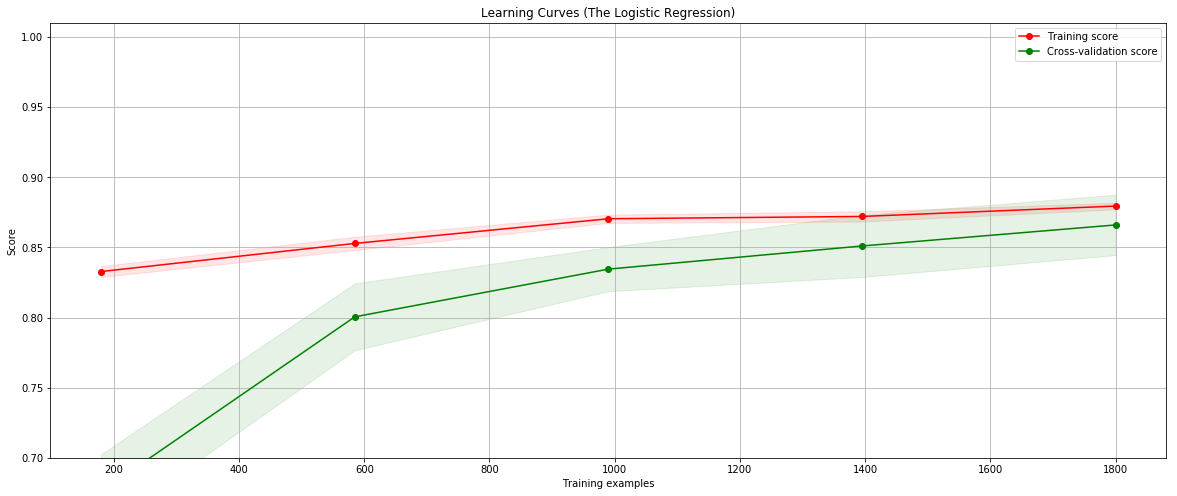

In [16]:
title = "Learning Curves (The Logistic Regression)"
estimator = lr
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=10) # run 10 parallels at the same time with n_job=10
plt.show()

# Ok ! Now we can know how the esimated model fits data well 

$\underline{\textbf{Noting that:}}$ We can use other ratio of train/test, estimators and cross validation to see how the above method differs from its alternative methods. To do that, please adjust the parameters such as: (estimator), (train_sizes), and (cv).